In [1]:
import numpy as np
import pandas as pd
from dateutil import parser
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sea

# Used with Pandas to help view hidden columns and rows  
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
OUTDIR = "data_weather/Final"

# EDA for each location for both Crowd and Temperature

### Load in both sets   

In [3]:
df1 = pd.read_csv(f"{OUTDIR}/Auckland_Pedestrian_daily.csv")
df1.head(10)
[df1['Date'].apply(lambda x: parser.parse(x).date()).values]

[array([datetime.date(2021, 1, 1), datetime.date(2021, 1, 2),
        datetime.date(2021, 1, 3), ..., datetime.date(2025, 12, 29),
        datetime.date(2025, 12, 30), datetime.date(2025, 12, 31)],
       dtype=object)]

In [4]:
df2 = pd.read_csv(f"{OUTDIR}/Dublin_Pedestrian_daily.csv")
df2.head(10)
[df2['Date'].apply(lambda x: parser.parse(x).date()).values]

[array([datetime.date(2021, 1, 1), datetime.date(2021, 1, 2),
        datetime.date(2021, 1, 3), ..., datetime.date(2025, 12, 29),
        datetime.date(2025, 12, 30), datetime.date(2025, 12, 31)],
       dtype=object)]

### Create our groups by location id and store them for different charts

In [6]:
df1_fs = []
for g in df1['Location_ID'].unique():
    sub = df1[df1['Location_ID'] == g][['Country','City','Location_Name','Date','PedsSen_Count','Is_Holiday','Weather_Temperature','Weather_Wind_Gust','Weather_Precipitation','Weather_Relative_Humidity']].reset_index(drop=True)
    df1_fs.append(sub)
print(df1_fs)

[          Country      City Location_Name        Date  PedsSen_Count  \
0     New Zealand  Auckland     Sky Tower  2021-01-01        36620.0   
1     New Zealand  Auckland     Sky Tower  2021-01-02        35415.0   
2     New Zealand  Auckland     Sky Tower  2021-01-03        37663.0   
3     New Zealand  Auckland     Sky Tower  2021-01-04        41416.0   
4     New Zealand  Auckland     Sky Tower  2021-01-05        55131.0   
5     New Zealand  Auckland     Sky Tower  2021-01-06        53695.0   
6     New Zealand  Auckland     Sky Tower  2021-01-07        58715.0   
7     New Zealand  Auckland     Sky Tower  2021-01-08        61342.0   
8     New Zealand  Auckland     Sky Tower  2021-01-09        51377.0   
9     New Zealand  Auckland     Sky Tower  2021-01-10        38325.0   
10    New Zealand  Auckland     Sky Tower  2021-01-11        52523.0   
11    New Zealand  Auckland     Sky Tower  2021-01-12        60837.0   
12    New Zealand  Auckland     Sky Tower  2021-01-13        58

In [7]:
df2_fs = []
for g in df2['Location_ID'].unique():
    sub = df2[df2['Location_ID'] == g][['Country','City','Location_Name','Date','PedsSen_Count','Is_Holiday','Weather_Temperature','Weather_Wind_Gust','Weather_Precipitation','Weather_Relative_Humidity']].reset_index(drop=True)
    df2_fs.append(sub)
print(df2_fs)

[      Country    City                    Location_Name        Date  \
0     Ireland  Dublin  Trinity College & Book of Kells  2021-01-01   
1     Ireland  Dublin  Trinity College & Book of Kells  2021-01-02   
2     Ireland  Dublin  Trinity College & Book of Kells  2021-01-03   
3     Ireland  Dublin  Trinity College & Book of Kells  2021-01-04   
4     Ireland  Dublin  Trinity College & Book of Kells  2021-01-05   
5     Ireland  Dublin  Trinity College & Book of Kells  2021-01-06   
6     Ireland  Dublin  Trinity College & Book of Kells  2021-01-07   
7     Ireland  Dublin  Trinity College & Book of Kells  2021-01-08   
8     Ireland  Dublin  Trinity College & Book of Kells  2021-01-09   
9     Ireland  Dublin  Trinity College & Book of Kells  2021-01-10   
10    Ireland  Dublin  Trinity College & Book of Kells  2021-01-11   
11    Ireland  Dublin  Trinity College & Book of Kells  2021-01-12   
12    Ireland  Dublin  Trinity College & Book of Kells  2021-01-13   
13    Ireland  Dubl

### Charts for Auckland 

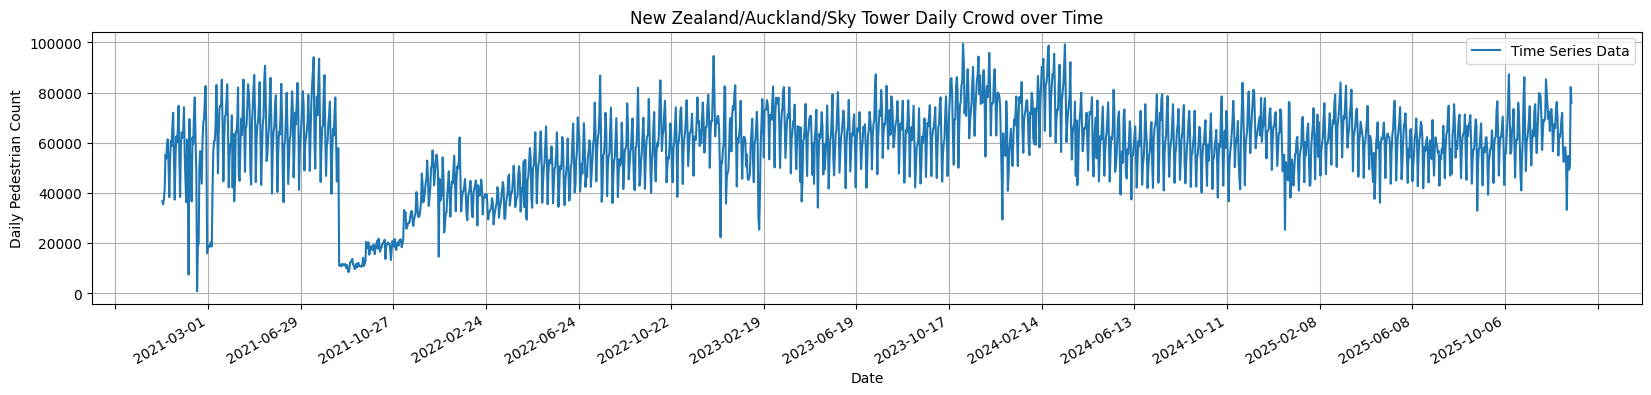

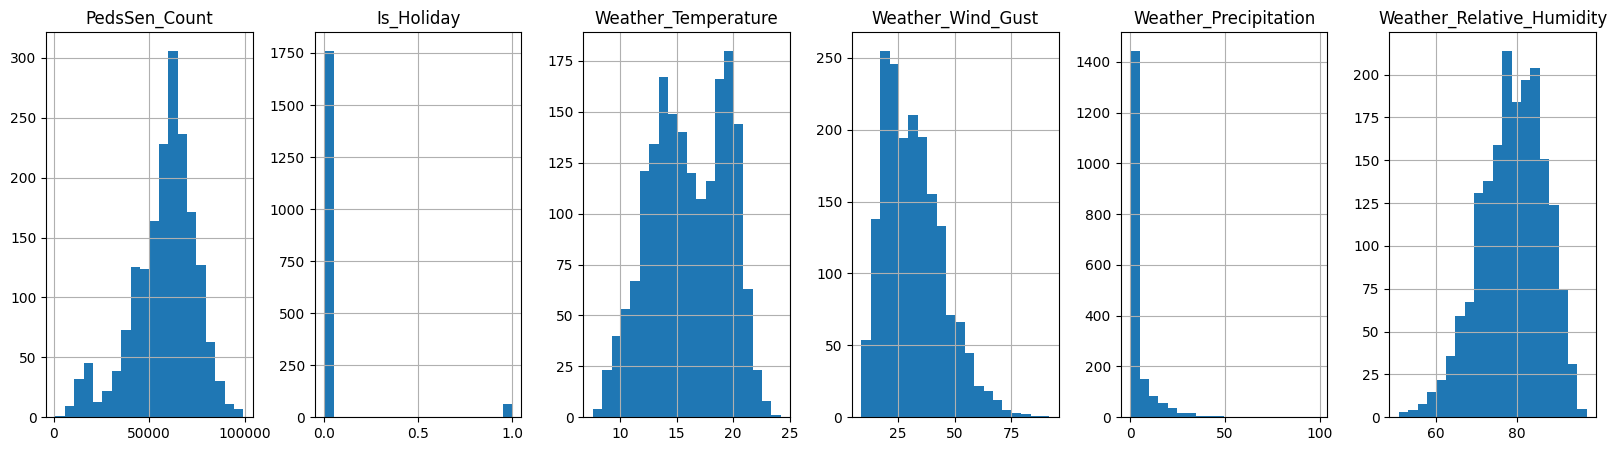

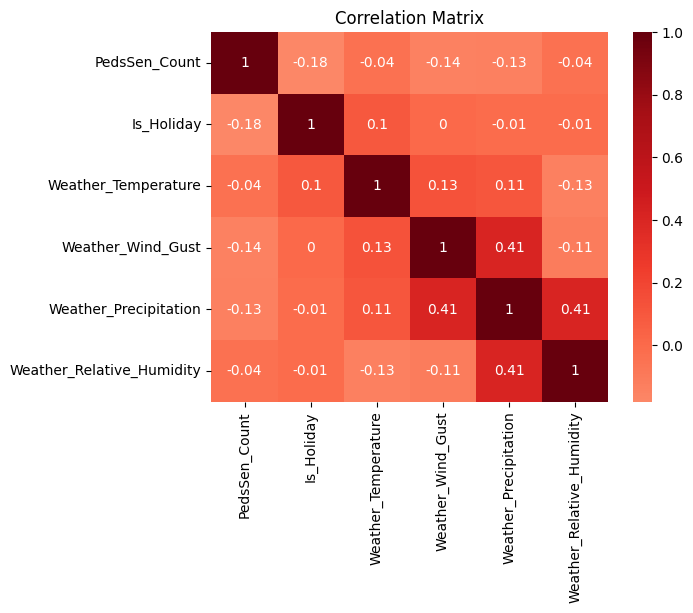

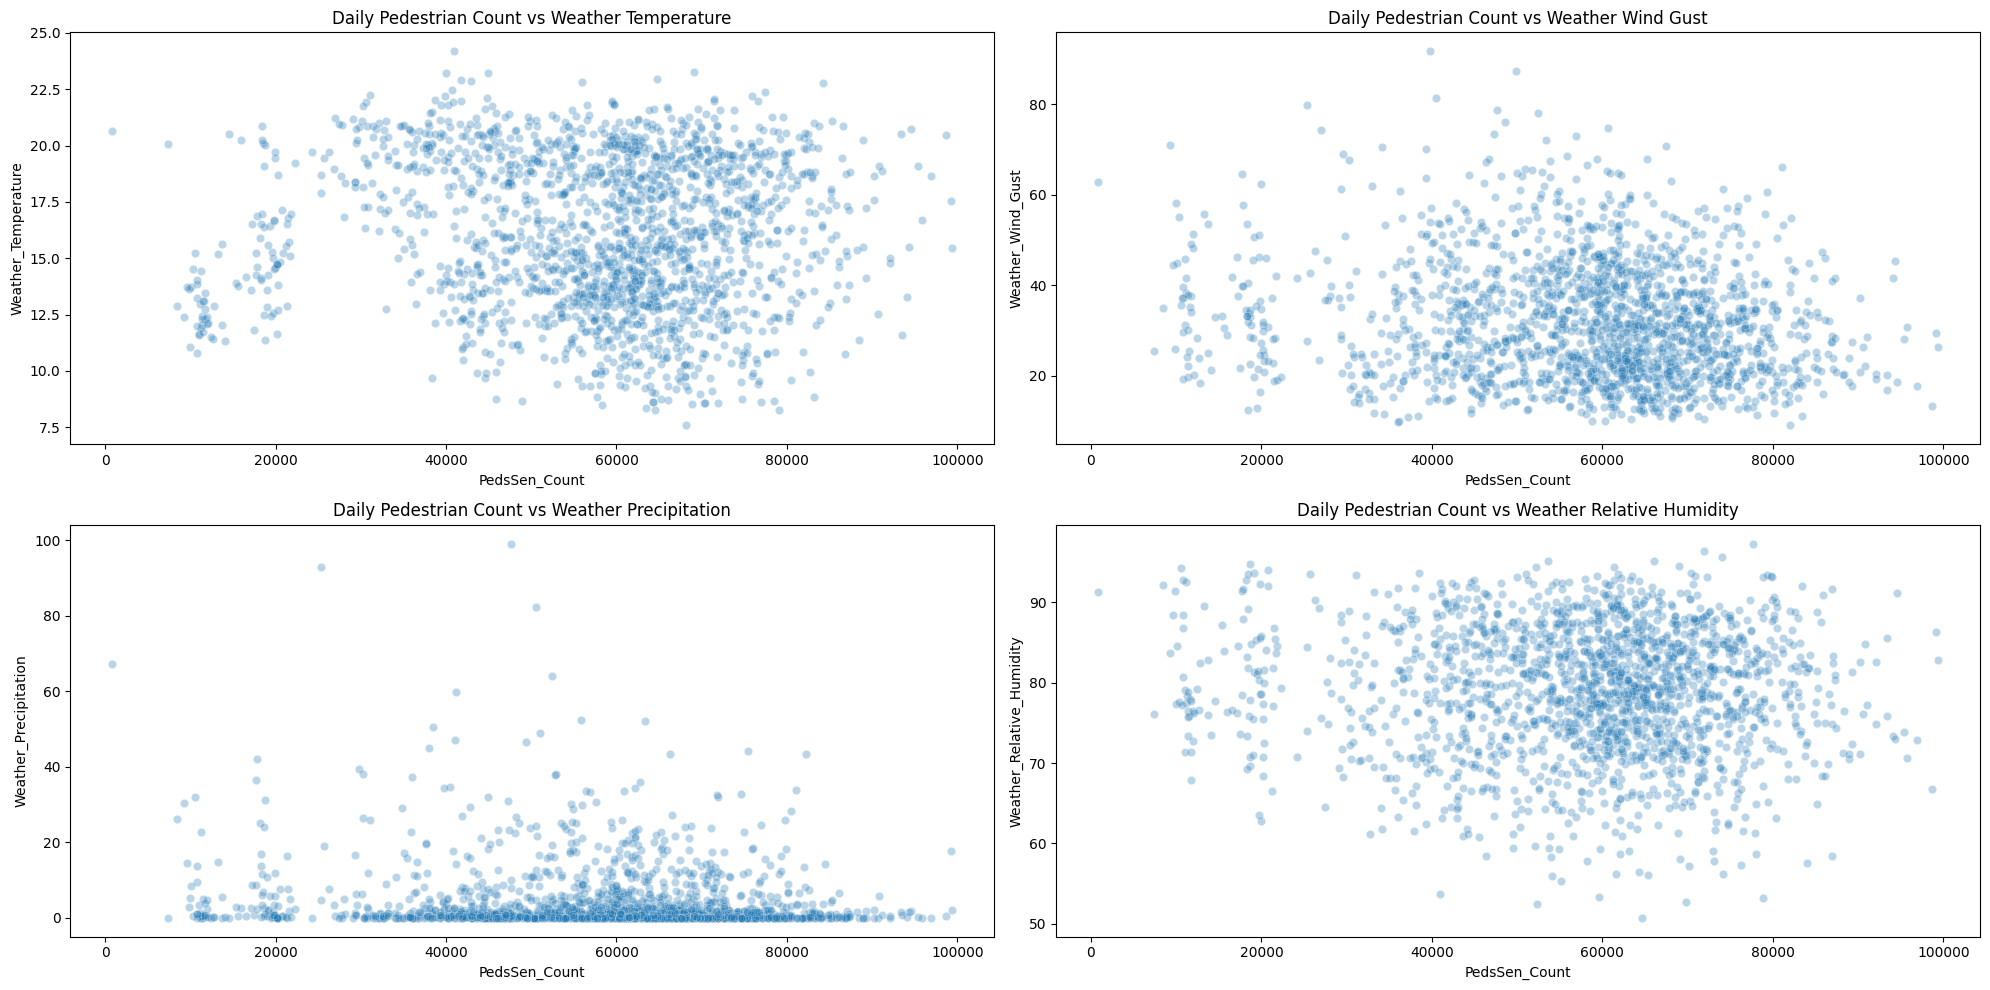

In [9]:
for g in df1_fs:
    # Time Series Line
    fig,ax = plt.subplots(figsize=(20,4))
    ax.plot(g['Date'],g['PedsSen_Count'], label='Time Series Data')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Pedestrian Count')
    ax.set_title(f'{g['Country'].unique()[0]}/{g['City'].unique()[0]}/{g['Location_Name'].unique()[0]} Daily Crowd over Time')
    ax.grid(True)
    ax.legend()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=120))
    fig.autofmt_xdate() # prevent overcrowding on the x-axis for label 
    plt.show()

    # Hist Dist
    g[g.columns[4:]].hist(layout=(1,6),bins=20,figsize=(20,5))
    plt.show()

    # Corr M
    sea.heatmap(g[g.columns[4:]].corr().round(2),annot=True,cmap='Reds', center=0,cbar=True)
    plt.title("Correlation Matrix")
    plt.show()

    fig1,ax1 = plt.subplots(2,2,figsize=(20,10))
    # Corr S
    sea.scatterplot(x='PedsSen_Count', y='Weather_Temperature', data=g[g.columns[4:]], alpha=0.3, ax=ax1[0,0])
    ax1[0,0].set_title("Daily Pedestrian Count vs Weather Temperature")

    sea.scatterplot(x='PedsSen_Count', y='Weather_Wind_Gust', data=g[g.columns[4:]], alpha=0.3, ax=ax1[0,1])
    ax1[0,1].set_title("Daily Pedestrian Count vs Weather Wind Gust")

    sea.scatterplot(x='PedsSen_Count', y='Weather_Precipitation', data=g[g.columns[4:]], alpha=0.3, ax=ax1[1,0])
    ax1[1,0].set_title("Daily Pedestrian Count vs Weather Precipitation")

    sea.scatterplot(x='PedsSen_Count', y='Weather_Relative_Humidity', data=g[g.columns[4:]], alpha=0.3, ax=ax1[1,1])
    ax1[1,1].set_title("Daily Pedestrian Count vs Weather Relative Humidity")

    plt.tight_layout()
    plt.show()

    break

### Charts for Dublin

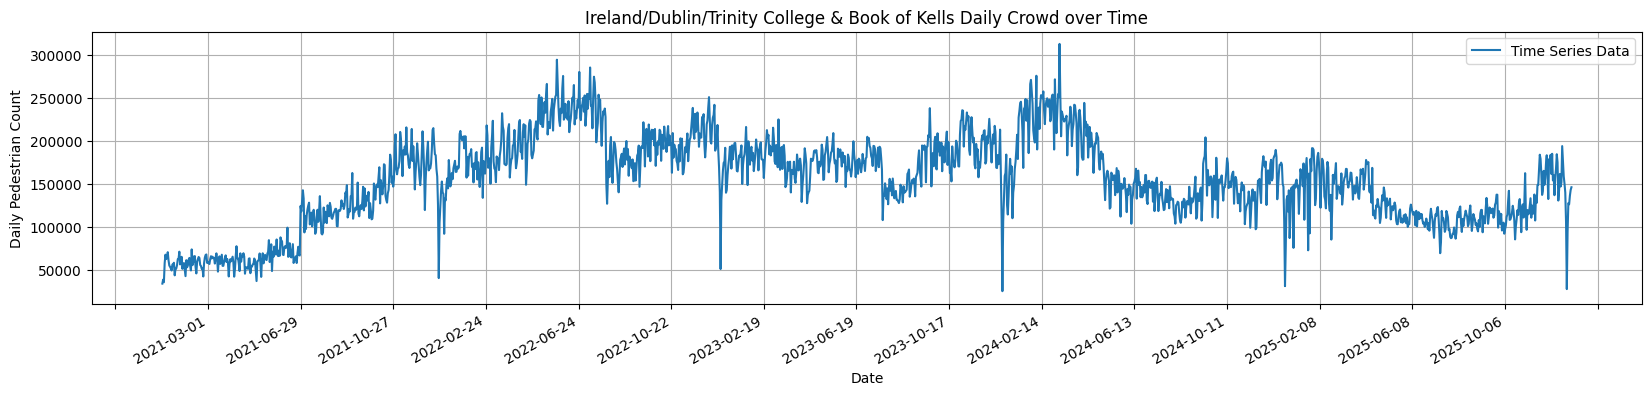

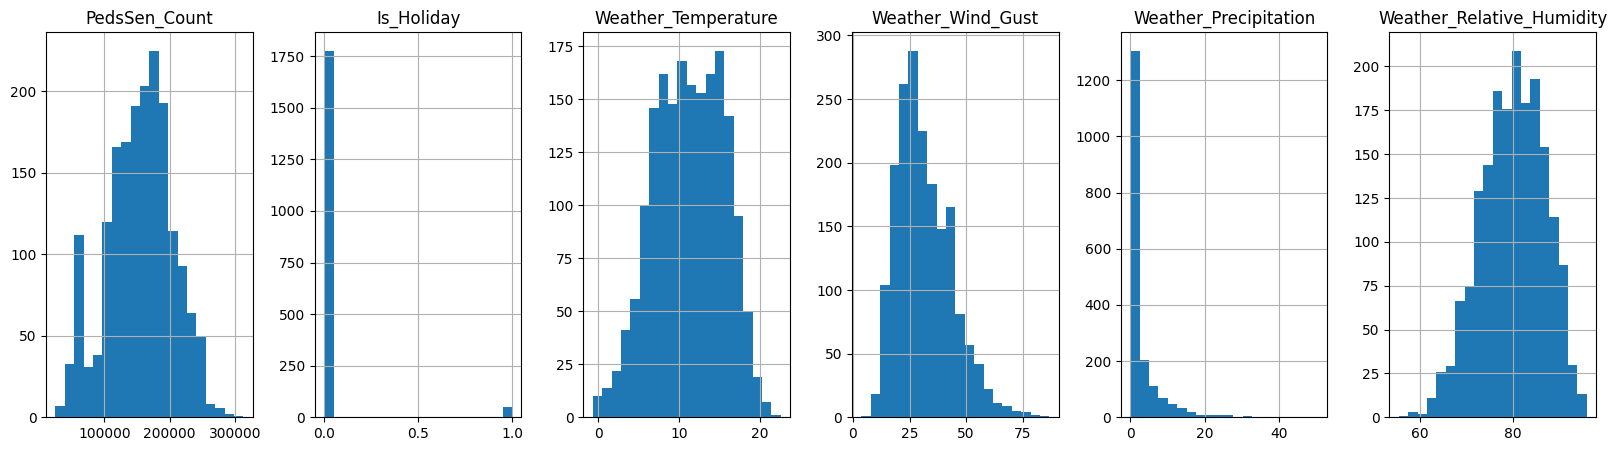

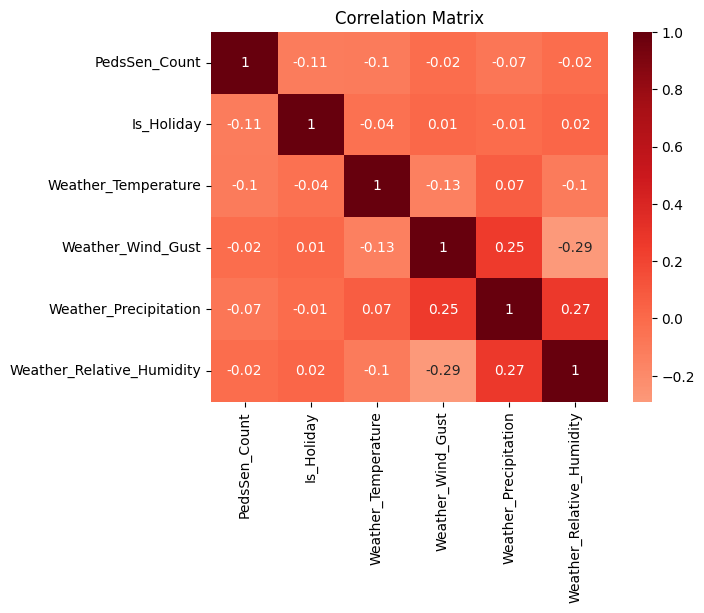

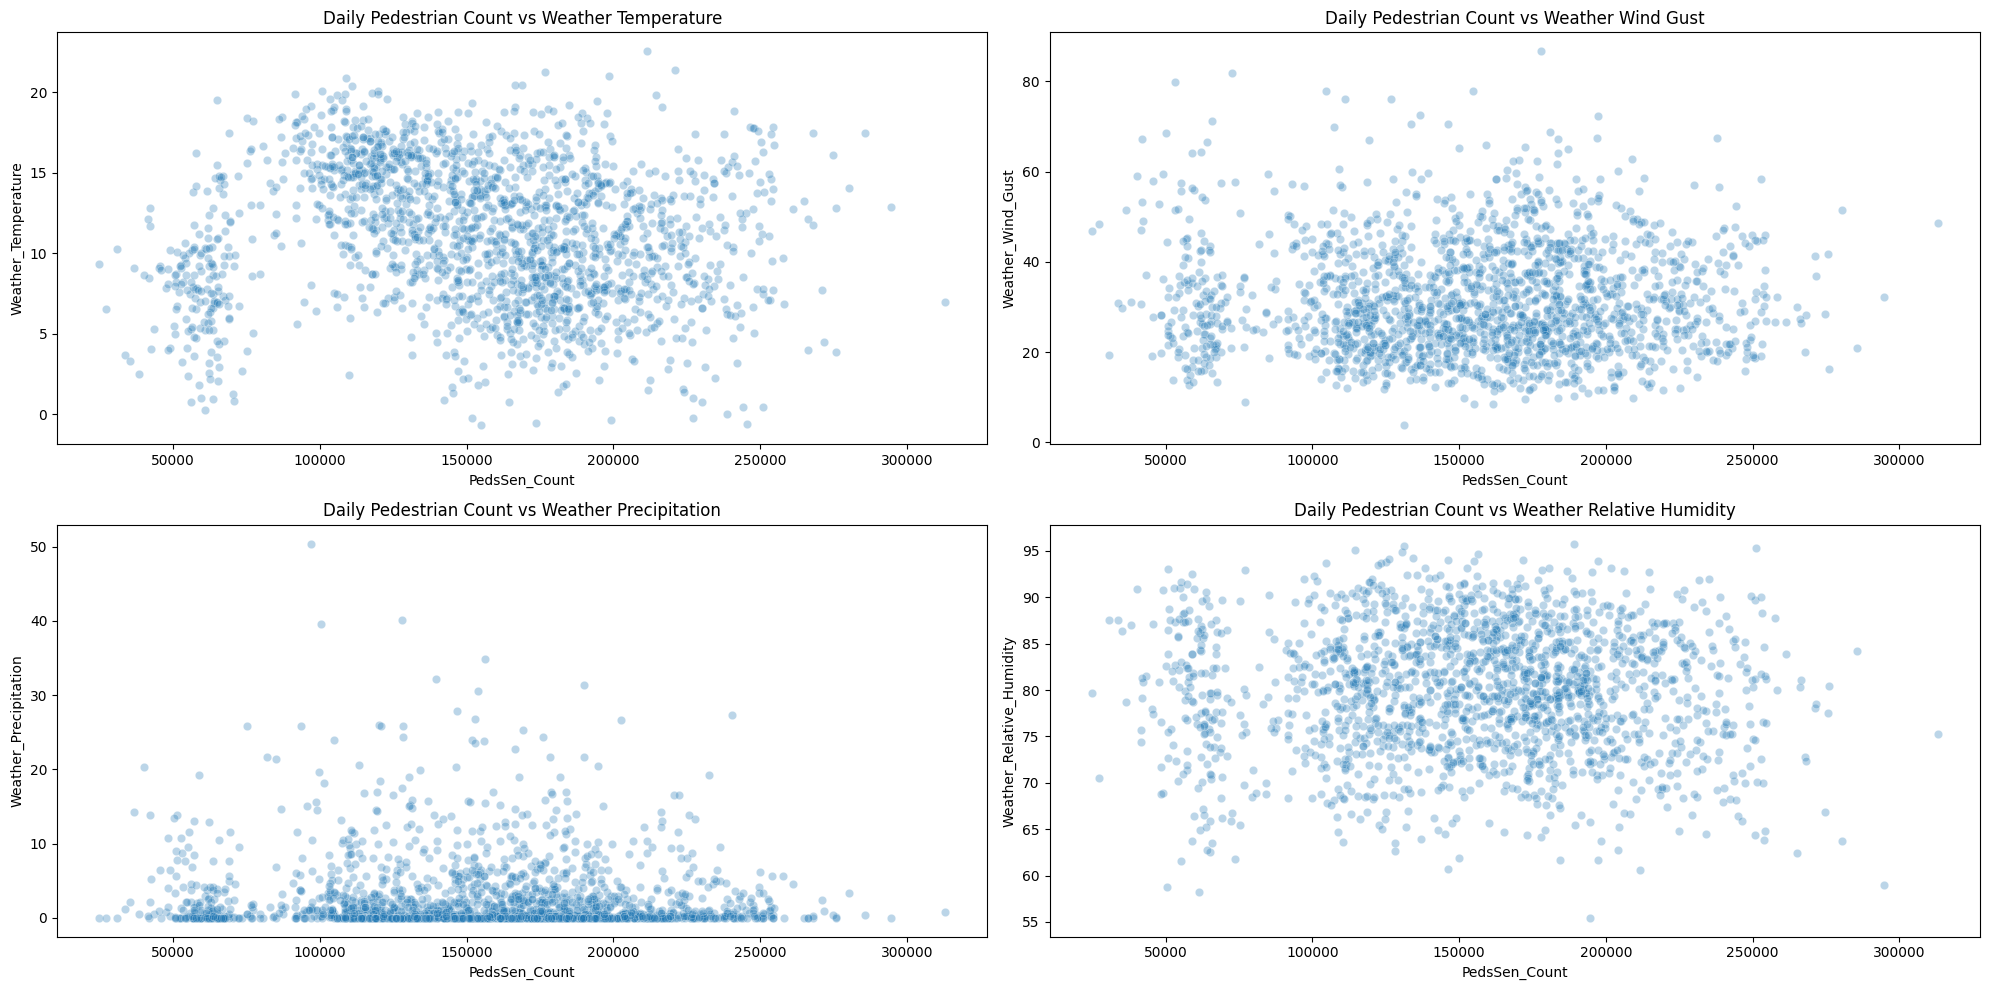

In [11]:
for g in df2_fs:
    # Time Series Line
    fig,ax = plt.subplots(figsize=(20,4))
    ax.plot(g['Date'],g['PedsSen_Count'], label='Time Series Data')
    ax.set_xlabel('Date')
    ax.set_ylabel('Daily Pedestrian Count')
    ax.set_title(f'{g['Country'].unique()[0]}/{g['City'].unique()[0]}/{g['Location_Name'].unique()[0]} Daily Crowd over Time')
    ax.grid(True)
    ax.legend()
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=120))
    fig.autofmt_xdate() # prevent overcrowding on the x-axis for label 
    plt.show()

    # Hist Dist
    g[g.columns[4:]].hist(layout=(1,6),bins=20,figsize=(20,5))
    plt.show()

    # Corr M
    sea.heatmap(g[g.columns[4:]].corr().round(2),annot=True,cmap='Reds', center=0,cbar=True)
    plt.title("Correlation Matrix")
    plt.show()

    fig1,ax1 = plt.subplots(2,2,figsize=(20,10))
    # Corr S
    sea.scatterplot(x='PedsSen_Count', y='Weather_Temperature', data=g[g.columns[4:]], alpha=0.3, ax=ax1[0,0])
    ax1[0,0].set_title("Daily Pedestrian Count vs Weather Temperature")

    sea.scatterplot(x='PedsSen_Count', y='Weather_Wind_Gust', data=g[g.columns[4:]], alpha=0.3, ax=ax1[0,1])
    ax1[0,1].set_title("Daily Pedestrian Count vs Weather Wind Gust")

    sea.scatterplot(x='PedsSen_Count', y='Weather_Precipitation', data=g[g.columns[4:]], alpha=0.3, ax=ax1[1,0])
    ax1[1,0].set_title("Daily Pedestrian Count vs Weather Precipitation")

    sea.scatterplot(x='PedsSen_Count', y='Weather_Relative_Humidity', data=g[g.columns[4:]], alpha=0.3, ax=ax1[1,1])
    ax1[1,1].set_title("Daily Pedestrian Count vs Weather Relative Humidity")

    plt.tight_layout()
    plt.show()
    break